# Classification

Customer Churn Analysis for a Bank

Dataset link : https://www.kaggle.com/nasirislamsujan/bank-customer-churn-prediction/data

# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [65]:
df = pd.read_csv('Churn_Modelling.csv')

### Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,AccountType,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,Savings,NaN,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,Checking,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,Savings,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,Savings,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,Savings,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
AccountType        10000 non-null object
Balance            6383 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


### Handling missing values and Imputing

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
AccountType           0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [6]:
#Imputing missing values
from sklearn import preprocessing

df['Balance'] = df['Balance'].transform(lambda grp: grp.fillna(grp.mean()))

In [7]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
AccountType        False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Dropping columns from dataset

In [8]:
print("Columns in the dataset = \n\n", df.columns.values)

Columns in the dataset = 

 ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'AccountType' 'Balance' 'NumOfProducts' 'HasCrCard'
 'IsActiveMember' 'EstimatedSalary' 'Exited']


There are 15 columns present in the dataset. After careful consideration of the columns we are droping the below columns, since they are not helping towards predicting the target variable.

1. RowNumber
2. CustomerId
3. Surname
4. AccountType

In [9]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname','AccountType'])
df = df.dropna()

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


### Data Visualization

##### Heatmap showing the correlation among the various features

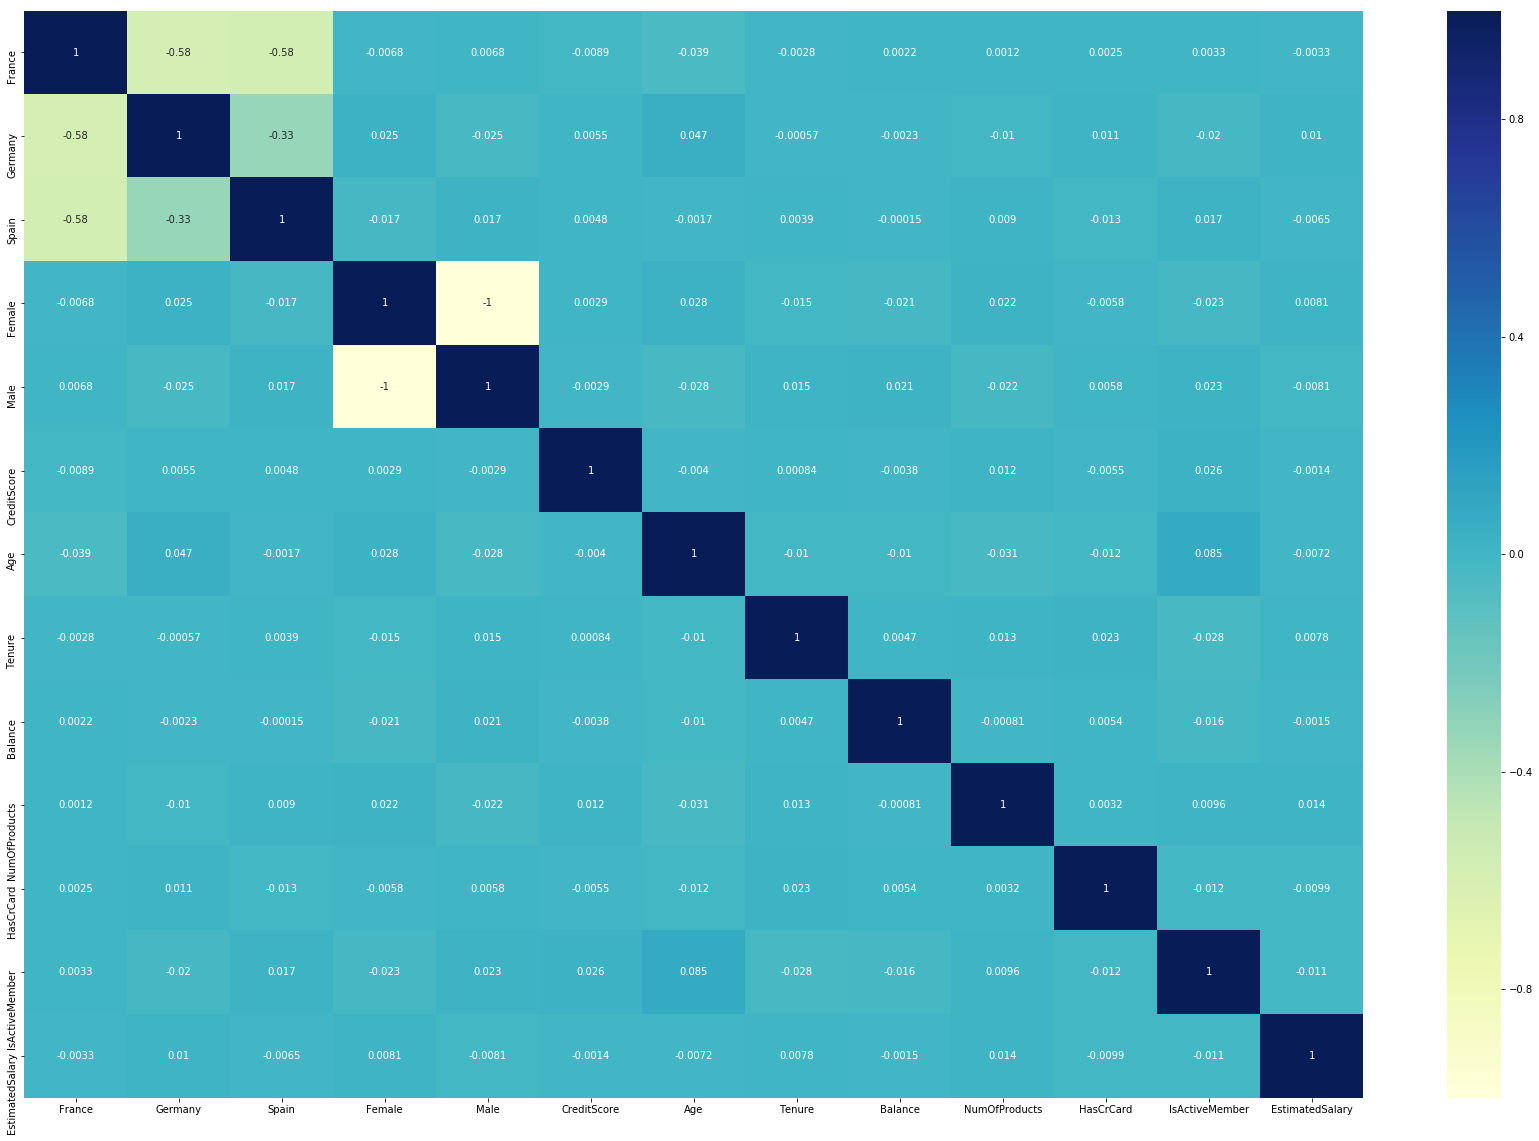

In [18]:
plt.figure(figsize=(30,20)) 
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

#### Histogram of various features present in the dataframe
The histogram is showing us the distribution of the data which will help us in determing the scaling of the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C68F1CEF28>,
      dtype=object)

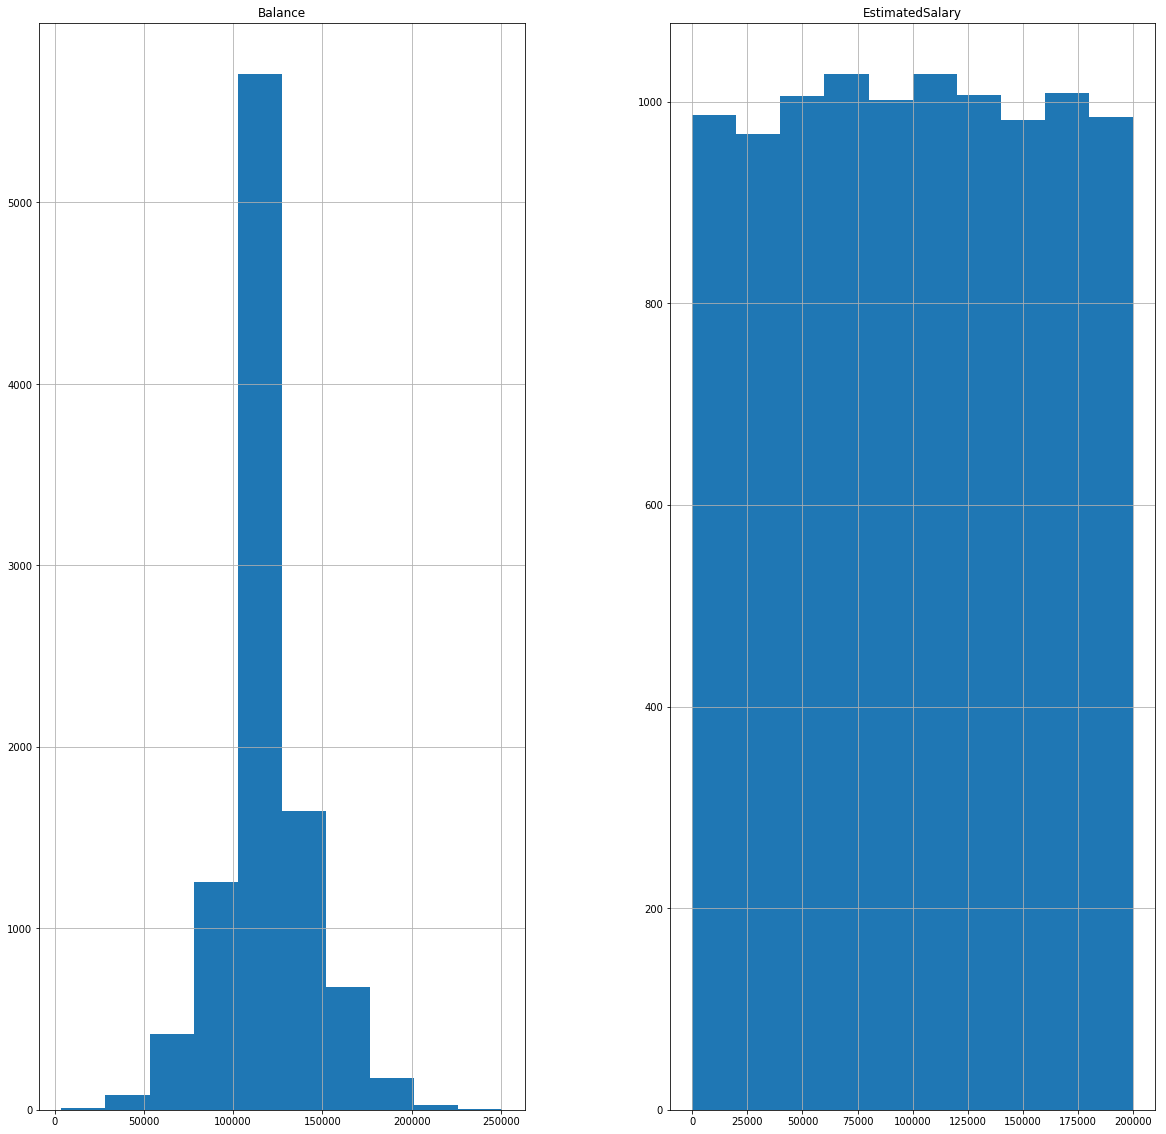

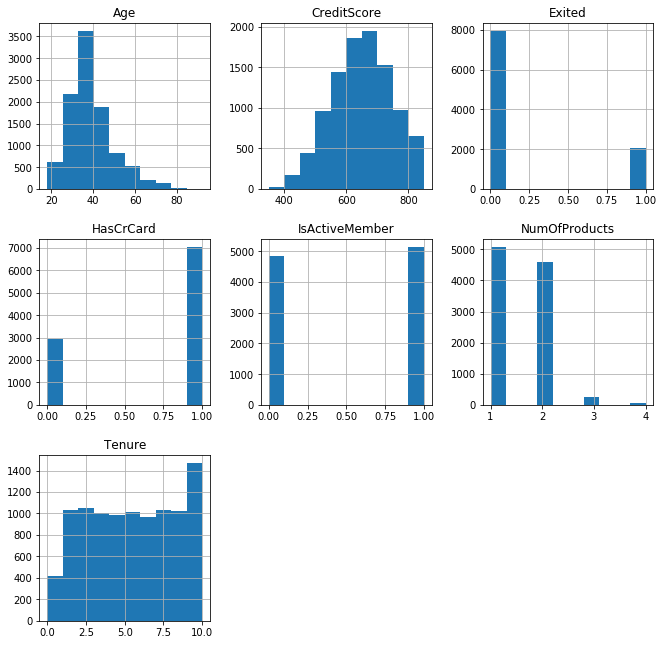

In [13]:
df[df.dtypes[(df.dtypes=="float")].index.values].hist(figsize=[20,20])
df[df.dtypes[(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

### Encoding the categorical data

We would be encoding the below categorical variables:
1. Geography
2. Gender

In [14]:
from  sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
feature_arr = enc.fit_transform(df[['Geography','Gender']]).toarray()
feature_labels = enc.categories_

feature_labels = np.array(feature_labels).ravel()
feature_labels =  np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns=feature_labels)
print(features)

      France  Germany  Spain  Female  Male
0        1.0      0.0    0.0     1.0   0.0
1        0.0      0.0    1.0     1.0   0.0
2        1.0      0.0    0.0     1.0   0.0
3        1.0      0.0    0.0     1.0   0.0
4        0.0      0.0    1.0     1.0   0.0
5        0.0      0.0    1.0     0.0   1.0
6        1.0      0.0    0.0     0.0   1.0
7        0.0      1.0    0.0     1.0   0.0
8        1.0      0.0    0.0     0.0   1.0
9        1.0      0.0    0.0     0.0   1.0
10       1.0      0.0    0.0     0.0   1.0
11       0.0      0.0    1.0     0.0   1.0
12       1.0      0.0    0.0     1.0   0.0
13       1.0      0.0    0.0     1.0   0.0
14       0.0      0.0    1.0     1.0   0.0
15       0.0      1.0    0.0     0.0   1.0
16       0.0      1.0    0.0     0.0   1.0
17       0.0      0.0    1.0     1.0   0.0
18       0.0      0.0    1.0     0.0   1.0
19       1.0      0.0    0.0     1.0   0.0
20       1.0      0.0    0.0     0.0   1.0
21       0.0      0.0    1.0     1.0   0.0
22       0.

In [15]:
df = df.drop(columns=['Geography', 'Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,119827.493793,1,1,1,101348.88,1
1,608,41,1,83807.860000,1,0,1,112542.58,0
2,502,42,8,159660.800000,3,1,0,113931.57,1
3,699,39,1,119827.493793,2,0,0,93826.63,0
4,850,43,2,125510.820000,1,1,1,79084.10,0


In [16]:
df = pd.concat([features,df], axis=1, sort=False)
df.head()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,619,42,2,119827.493793,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.860000,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.800000,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,699,39,1,119827.493793,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.820000,1,1,1,79084.10,0


In [17]:
y = df['Exited']
X = df.drop(['Exited'], axis=1)

### Feature Scaling

We are verifying the ditribution of data, whether the data is normally distributed or not.

In [19]:
from scipy import stats

a=np.array(df)
k,p=stats.mstats.normaltest(X) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

for i in range(len(X.columns)) :
    if p[i]<0.05:
      print(X.columns[i],'variable is not normal')
    else:
      print(X.columns[i],'variable is normal')

France variable is not normal
Germany variable is not normal
Spain variable is not normal
Female variable is not normal
Male variable is not normal
CreditScore variable is not normal
Age variable is not normal
Tenure variable is not normal
Balance variable is not normal
NumOfProducts variable is not normal
HasCrCard variable is not normal
IsActiveMember variable is not normal
EstimatedSalary variable is not normal


From the code above we can see that the data is not normally ditributed. We have performed z-test for checking the skewness of data and verified the associated p-value as well with 5% significance level.

As we can see above that the data is not normal. StandardScaler performs better with Normally distibuted data. Hence we will use MinMaxSclaer for our analysis.

In [20]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train1, y_test1 = train_test_split(X,y, test_size=0.2, random_state = 2)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train_org)
X_test1 = scaler.transform(X_test_org)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
X.head()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619,42,2,119827.493793,1,1,1,101348.88
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.860000,1,0,1,112542.58
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.800000,3,1,0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699,39,1,119827.493793,2,0,0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.820000,1,1,1,79084.10


## Classification:

In [22]:
X.head()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619,42,2,119827.493793,1,1,1,101348.88
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.860000,1,0,1,112542.58
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.800000,3,1,0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699,39,1,119827.493793,2,0,0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.820000,1,1,1,79084.10


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### KNN Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train1, y_train1)
    train_score_array.append(knn.score(X_train1, y_train1.ravel()))
    test_score_array.append(knn.score(X_test1, y_test1))

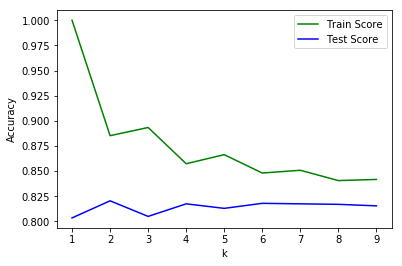

In [25]:
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

Finding the best parameter using Grid Search

In [26]:
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train1, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 4}
Best cross-validation score: 0.82


In [27]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013848,0.000687,0.046087,0.004569,1,{'n_neighbors': 1},0.784020,0.785268,0.757803,0.794007,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.013259,0.000461,0.049869,0.006981,2,{'n_neighbors': 2},0.820225,0.817728,0.805243,0.812734,...,0.885679,0.884706,0.884167,0.885278,0.882377,0.882933,0.885016,0.884322,0.884125,0.001047
2,0.013265,0.000464,0.047469,0.000650,3,{'n_neighbors': 3},0.817728,0.806492,0.805243,0.806492,...,0.892068,0.893874,0.892222,0.892083,0.890987,0.891543,0.892376,0.893209,0.892083,0.001104
3,0.013961,0.000774,0.050772,0.003493,4,{'n_neighbors': 4},0.817728,0.810237,0.820225,0.813983,...,0.858175,0.858869,0.857778,0.856806,0.856270,0.856964,0.858353,0.855853,0.857278,0.001128
4,0.013365,0.000488,0.049367,0.001281,5,{'n_neighbors': 5},0.828964,0.810237,0.810237,0.818976,...,0.865537,0.866787,0.865000,0.864028,0.861408,0.862936,0.866546,0.866824,0.864611,0.001878


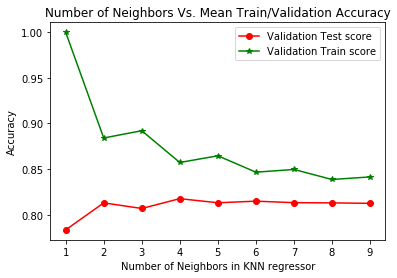

In [28]:
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

Rebuilding the model using best parameters from grid search

In [29]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train1, y_train1)
print('Train score on best parameters {}'.format(knn.score(X_train1,y_train1)))
print('Test score on best parameters {}'.format(knn.score(X_test1,y_test1)))

Train score on best parameters 0.857375
Test score on best parameters 0.8175


In [53]:
from sklearn.metrics import confusion_matrix
pred_knn_test = knn.predict(X_test1)
pred_knn_train = lg.predict(X_train1)
confusion_test = confusion_matrix(y_test1, pred_knn_test)
confusion_train = confusion_matrix(y_train1, pred_knn_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[1562   55]
 [ 310   73]]
Confusion matrix for train:
[[6159  187]
 [1330  324]]


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, pred_knn_test, target_names=["Not Exited", "Exited"]))

              precision    recall  f1-score   support

  Not Exited       0.83      0.97      0.90      1617
      Exited       0.57      0.19      0.29       383

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.82      0.78      2000



### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train1, y_train1)
    log_l2.fit(X_train1, y_train1)
    train_score_l1.append(log_l1.score(X_train1, y_train1))
    train_score_l2.append(log_l2.score(X_train1, y_train1))
    test_score_l1.append(log_l1.score(X_test1, y_test1))
    test_score_l2.append(log_l2.score(X_test1, y_test1))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

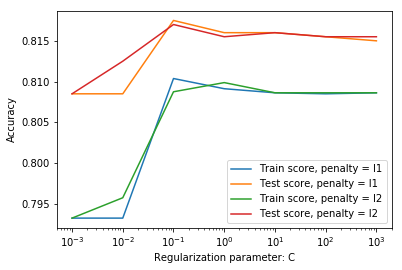

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train1, y_train1)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.809000


In [34]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006994,0.001289,0.000984,0.000029,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.793254,0.793125,0.793125,...,0.79325,0.000192,10,0.793249,0.793281,0.793281,0.793281,0.793157,0.793250,0.000048
1,0.007573,0.000803,0.000199,0.000399,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.793254,0.793125,0.793125,...,0.79325,0.000192,10,0.793249,0.793281,0.793281,0.793281,0.793157,0.793250,0.000048
2,0.011175,0.001167,0.000592,0.000483,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.793254,0.793125,0.793125,...,0.79325,0.000192,10,0.793249,0.793281,0.793281,0.793281,0.793157,0.793250,0.000048
3,0.011370,0.001849,0.000598,0.000488,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.795128,0.793750,0.793750,...,0.79450,0.000618,9,0.794812,0.794063,0.794687,0.794531,0.794563,0.794531,0.000254
4,0.027931,0.003199,0.000598,0.000488,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.798251,0.806250,0.811875,...,0.80900,0.006561,1,0.812471,0.808594,0.811250,0.810312,0.806749,0.809875,0.002012


In [35]:
lg = LogisticRegression(C=0.1,penalty='l1').fit(X_train1, y_train1)
print('Train score on best parameters {}'.format(lg.score(X_train1,y_train1)))
print('Test score on best parameters {}'.format(lg.score(X_test1,y_test1)))

Train score on best parameters 0.810375
Test score on best parameters 0.8175


C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import confusion_matrix
pred_logreg_test = lg.predict(X_test1)
pred_logreg_train = lg.predict(X_train1)
confusion_test = confusion_matrix(y_test1, pred_logreg_test)
confusion_train = confusion_matrix(y_train1, pred_logreg_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[1578   39]
 [ 326   57]]
Confusion matrix for train:
[[6159  187]
 [1330  324]]


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, pred_logreg_test, target_names=["Not Exited", "Exited"]))

              precision    recall  f1-score   support

  Not Exited       0.83      0.98      0.90      1617
      Exited       0.59      0.15      0.24       383

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.71      0.56      0.57      2000
weighted avg       0.78      0.82      0.77      2000



### Linear SVM & Kernel SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
param_grid = {'C': [0.001, 0.1, 10],
              'gamma': [0.001, 0.1, 10], 'degree':[1,2,3,4]}

grid_search = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train1, y_train1)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test1, y_test1)))

Best parameters: {'C': 10, 'degree': 1, 'gamma': 0.1}
Best cross-validation score: 0.84
Test set score: 0.85


In [43]:
clf1 = LinearSVC(C=10).fit(X_train1, y_train1)
clf2 = SVC(kernel='linear', C=10).fit(X_train1, y_train1)
clf3 = SVC(kernel='rbf', gamma=.1, C=10).fit(X_train1, y_train1)
clf4 = SVC(kernel='poly', degree=1, C=10).fit(X_train1, y_train1)
print('Train score on best parameters for LinearSVC - {}'.format(clf1.score(X_train1, y_train1)))
print('Test score on best parameters ffor LinearSVC - {}'.format(clf1.score(X_test1,y_test1)))
print('Train score on best parameters for SVC kernel - Linear {}'.format(clf2.score(X_train1,y_train1)))
print('Test score on best parameters for SVC kernel - Linear {}'.format(clf2.score(X_test1,y_test1)))
print('Train score on best parameters for SVC kernel - rbf {}'.format(clf3.score(X_train1,y_train1)))
print('Test score on best parameters for SVC kernel - rbf {}'.format(clf3.score(X_test1,y_test1)))
print('Train score on best parameters for SVC kernel - poly {}'.format(clf4.score(X_train1,y_train1)))
print('Test score on best parameters for SVC kernel - poly {}'.format(clf4.score(X_test1,y_test1)))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score on best parameters for LinearSVC - 0.80625
Test score on best parameters ffor LinearSVC - 0.816
Train score on best parameters for SVC kernel - Linear 0.79325
Test score on best parameters for SVC kernel - Linear 0.8085
Train score on best parameters for SVC kernel - rbf 0.848375
Test score on best parameters for SVC kernel - rbf 0.849
Train score on best parameters for SVC kernel - poly 0.79325
Test score on best parameters for SVC kernel - poly 0.8085


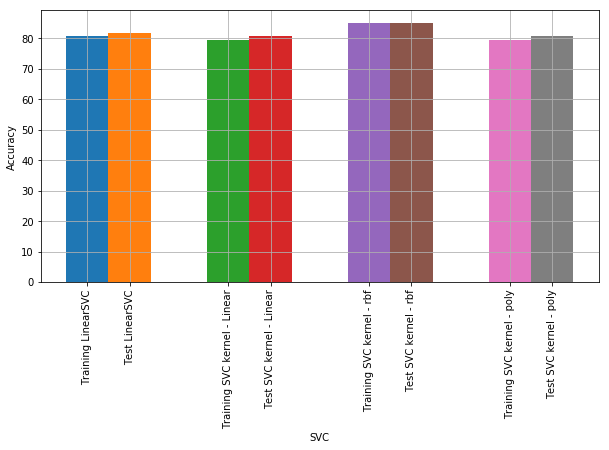

In [163]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
plt.xlabel('SVC')
plt.ylabel('Accuracy')
labels = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
labels1 = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[80.6,79.32,84.83,79.32]
accuracies_test=[81.6,80.8,84.9,80.8]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

### Decision Tree

In [45]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test1, y_test1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.798


In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search.fit(X_train1, y_train1)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.86


In [48]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=0)
dtree.fit(X_train1, y_train1)

print("Accuracy on training set: {:.6f}".format(dtree.score(X_train1, y_train1)))
print("Accuracy on test set: {:.6f}".format(dtree.score(X_test1, y_test1)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Accuracy on training set: 0.867000
Accuracy on test set: 0.851500
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.86


In [55]:
from sklearn.metrics import confusion_matrix
pred_dtree_test = dtree.predict(X_test1)
pred_dtree_train = dtree.predict(X_train1)
confusion_test = confusion_matrix(y_test1, pred_dtree_test)
confusion_train = confusion_matrix(y_train1, pred_dtree_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[1547   70]
 [ 227  156]]
Confusion matrix for train:
[[6125  221]
 [ 843  811]]


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, pred_dtree_test, target_names=["Not Exited", "Exited"]))

              precision    recall  f1-score   support

  Not Exited       0.87      0.96      0.91      1617
      Exited       0.69      0.41      0.51       383

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.84      0.85      0.84      2000



## Conclusion for Classification

#### Model Evaluation:

In [49]:
outside = ['Results','Results','Results','Results']
inside = ['Best parameter', 'Best Cross-Validation Score', 'Train Score on best parameter', 'Test Score on best parameter']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [61]:
data_reg = np.array([(4,0.1,10,10,0.1,1,6),
                     (0.820,0.809,0.840,0.840,0.840,0.840,0.851),
                     (0.857,0.810,0.806,0.793,0.848,0.793,0.867),
                     (0.817,0.817,0.816,0.808,0.849,0.808,0.851)])

In [62]:
df = pd.DataFrame(data_reg,index=hier_index,columns=['KNN Classification','Logistic Regression', 'LinearSVR', 'SVM kernel - Linear', 'SVM kernel - rbf', 'SVM kernel - poly','Decision Tree'])


In [63]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='YlOrRd')
s

After making multiple models for the given dataset, we have concluded that the below algorithm with the specified parameters will give us best result for classification task in predicting the value of the target variable 'Exited'

Algorithm : Decision Tree

Best parameters : max_depth =6

Best cross-validation score: 0.851

Train score on best parameters:0.867

Test score on best parameters:0.851

# Regression

Airbnb Price Prediction

The dataset consisted of Airbnb data from multiple cities in US , but we have restricted the scope of this project to just one city i.e San Fransisco(SF)

Link to Dataset : https://www.kaggle.com/naamaavi/airbnb-price-prediction-regression-project/data

# Importing Libraries and Exploring the datasets

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [101]:
#reading the CSV files as DataFrames
df = pd.read_csv('sf.csv')

# Exploring the CSV files, their shapes and columns

In [102]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,thumbnail_url,zipcode,bedrooms,beds,CableTV,Freeparkingonpremises,Internet,SelfCheck-In,TV,Washer
0,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
1,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,https://a0.muscache.com/im/pictures/82509143-4...,94131.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,180792,4.787492,House,Private room,2,1.0,Real Bed,moderate,True,SF,...,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,16904896,4.828314,House,Private room,2,1.0,Real Bed,strict,True,SF,...,https://a0.muscache.com/im/pictures/38471493/2...,94118.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3530517,6.620073,Apartment,Entire home/apt,6,2.0,Real Bed,flexible,True,SF,...,https://a0.muscache.com/im/pictures/fdfb3056-3...,94127.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0


In [103]:
print("Shape of the DataFrame = \n  df = {}" .format(df.shape))

Shape of the DataFrame = 
  df = (6434, 34)


In [104]:
print("Columns in Airbnb dataset are : \n\n", df.columns.values)

Columns in Airbnb dataset are : 

 ['id' 'log_price' 'property_type' 'room_type' 'accommodates' 'bathrooms'
 'bed_type' 'cancellation_policy' 'cleaning_fee' 'city' 'description'
 'first_review' 'host_has_profile_pic' 'host_identity_verified'
 'host_response_rate' 'host_since' 'instant_bookable' 'last_review'
 'latitude' 'longitude' 'name' 'neighbourhood' 'number_of_reviews'
 'review_scores_rating' 'thumbnail_url' 'zipcode' 'bedrooms' 'beds'
 'CableTV' 'Freeparkingonpremises' 'Internet' 'SelfCheck-In' 'TV' 'Washer']


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6434 entries, 0 to 6433
Data columns (total 34 columns):
id                        6434 non-null int64
log_price                 6434 non-null float64
property_type             6434 non-null object
room_type                 6434 non-null object
accommodates              6434 non-null int64
bathrooms                 6417 non-null float64
bed_type                  6434 non-null object
cancellation_policy       6434 non-null object
cleaning_fee              6434 non-null bool
city                      6434 non-null object
description               6434 non-null object
first_review              5117 non-null object
host_has_profile_pic      6432 non-null object
host_identity_verified    6432 non-null object
host_response_rate        4445 non-null object
host_since                6432 non-null object
instant_bookable          6434 non-null object
last_review               5117 non-null object
latitude                  6434 non-null float64
l

# Handling missing values in the dataset

In [106]:
#Finding the missing values in the dataframe
df.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   17
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1317
host_has_profile_pic         2
host_identity_verified       2
host_response_rate        1989
host_since                   2
instant_bookable             0
last_review               1317
latitude                     0
longitude                    0
name                         0
neighbourhood                6
number_of_reviews            0
review_scores_rating      1387
thumbnail_url              480
zipcode                     80
bedrooms                     6
beds                        11
CableTV                    110
Freeparkingonpremises      110
Internet                   110
SelfCheck-In               110
TV      

We can see that there are some missing values in bedrooms, bathroooms etc which can be dropped.
Apart from that , missing values in review_scores_rating is handled by grouping them by zipcode and replacing the missing rating value by mean of rating.
Other missing values will not affect the model as they wont be inluded in the model. eg. first_review, last_review, id, host_response_rate,thumbnail_url

In [107]:
#drop missing values
df.dropna(how='any',subset= ['beds', 'bedrooms', 'zipcode','bathrooms'],inplace = True)

In [108]:
#Grouping by zipcode and imputing the mean rating
df['review_scores_rating'] = df.groupby(['zipcode'])['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))

In [111]:
df.dropna(how='any',subset= ['review_scores_rating'],inplace = True)

In [112]:
#dropping the remaining missing values
df.dropna(how='any',subset= ['CableTV', 'Freeparkingonpremises', 'Internet','SelfCheck-In','TV','Washer'],inplace = True)

In [113]:
df.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1259
host_has_profile_pic         2
host_identity_verified       2
host_response_rate        1912
host_since                   2
instant_bookable             0
last_review               1259
latitude                     0
longitude                    0
name                         0
neighbourhood                6
number_of_reviews            0
review_scores_rating         0
thumbnail_url              464
zipcode                      0
bedrooms                     0
beds                         0
CableTV                      0
Freeparkingonpremises        0
Internet                     0
SelfCheck-In                 0
TV      

# Feature Engineering

For property type we have 35 property types. To reduce number of features, property type is grouped in to 5 catagories: Apartment, House, Hotel1, Hotel2 and other, to use with OneHotEncoder

In [114]:
dict1 = {'Apartment':['Condominium','Timeshare','Loft','Serviced apartment','Guest suite'],
         'House':['Vacation home','Villa','Townhouse','In-law','Casa particular'],
         'Hotel1':['Dorm','Hostel','Guesthouse'],
         'Hotel2':['Boutique hotel','Bed & Breakfast'],
         'Other':['Island','Castle','Yurt','Hut','Chalet','Treehouse',
                  'Earth House','Tipi','Cave','Train','Parking Space','Lighthouse',
                 'Tent','Boat','Cabin','Camper/RV','Bungalow']
        }
dict2 = {i : k for k, v in dict1.items() for i in v}
df['property_type'].replace(dict2,inplace =True)

For cancellation_policy  we have 5 property types. To reduce number of features, super_strict_60 , super_strict_30 and strict are grouped as strict

In [115]:
dict4 = {'strict':['super_strict_60','super_strict_30','strict']
        }
dict3 = {i : k for k, v in dict4.items() for i in v}
df['cancellation_policy'].replace(dict3,inplace =True)

# Data Visualization

# Heatmap

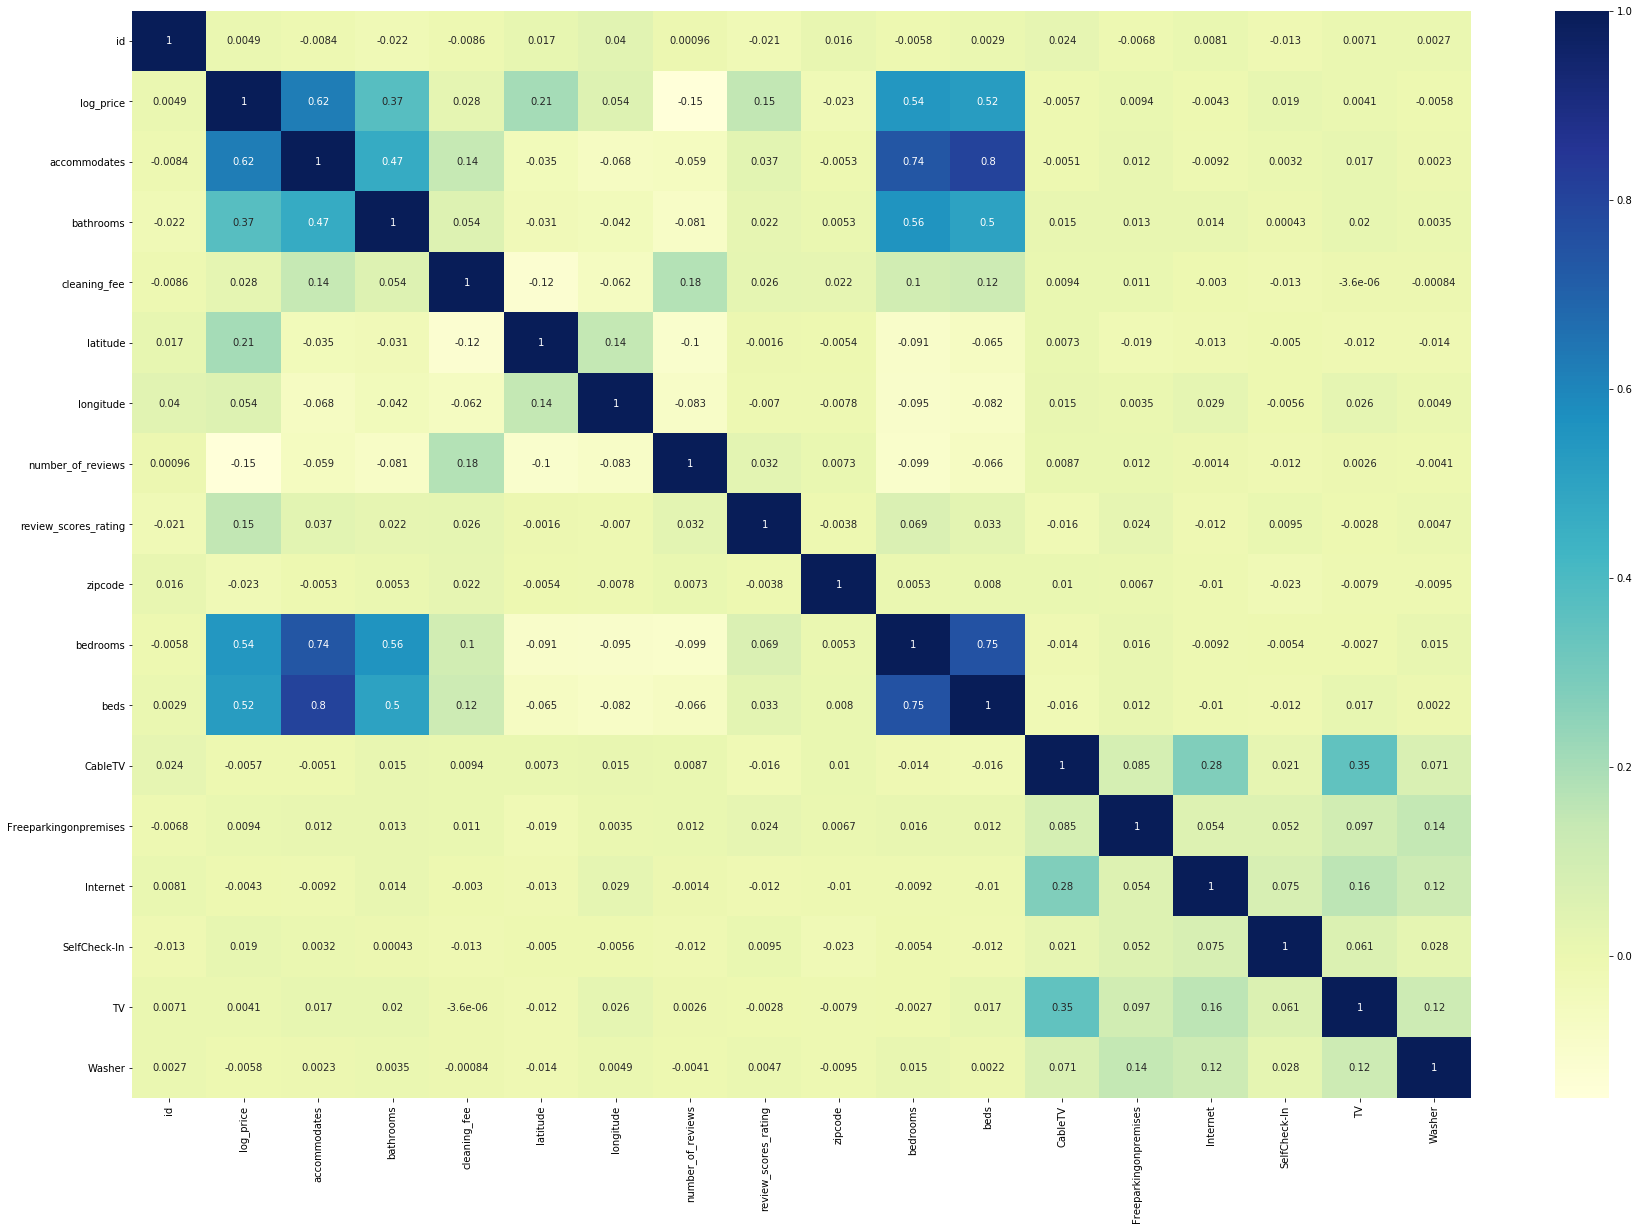

In [80]:
plt.figure(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

# Histogram of various features present in the dataframe

The histogram is showing us the distribution of the data which will help us in determing the scaling of the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C68E37B668>,
      dtype=object)

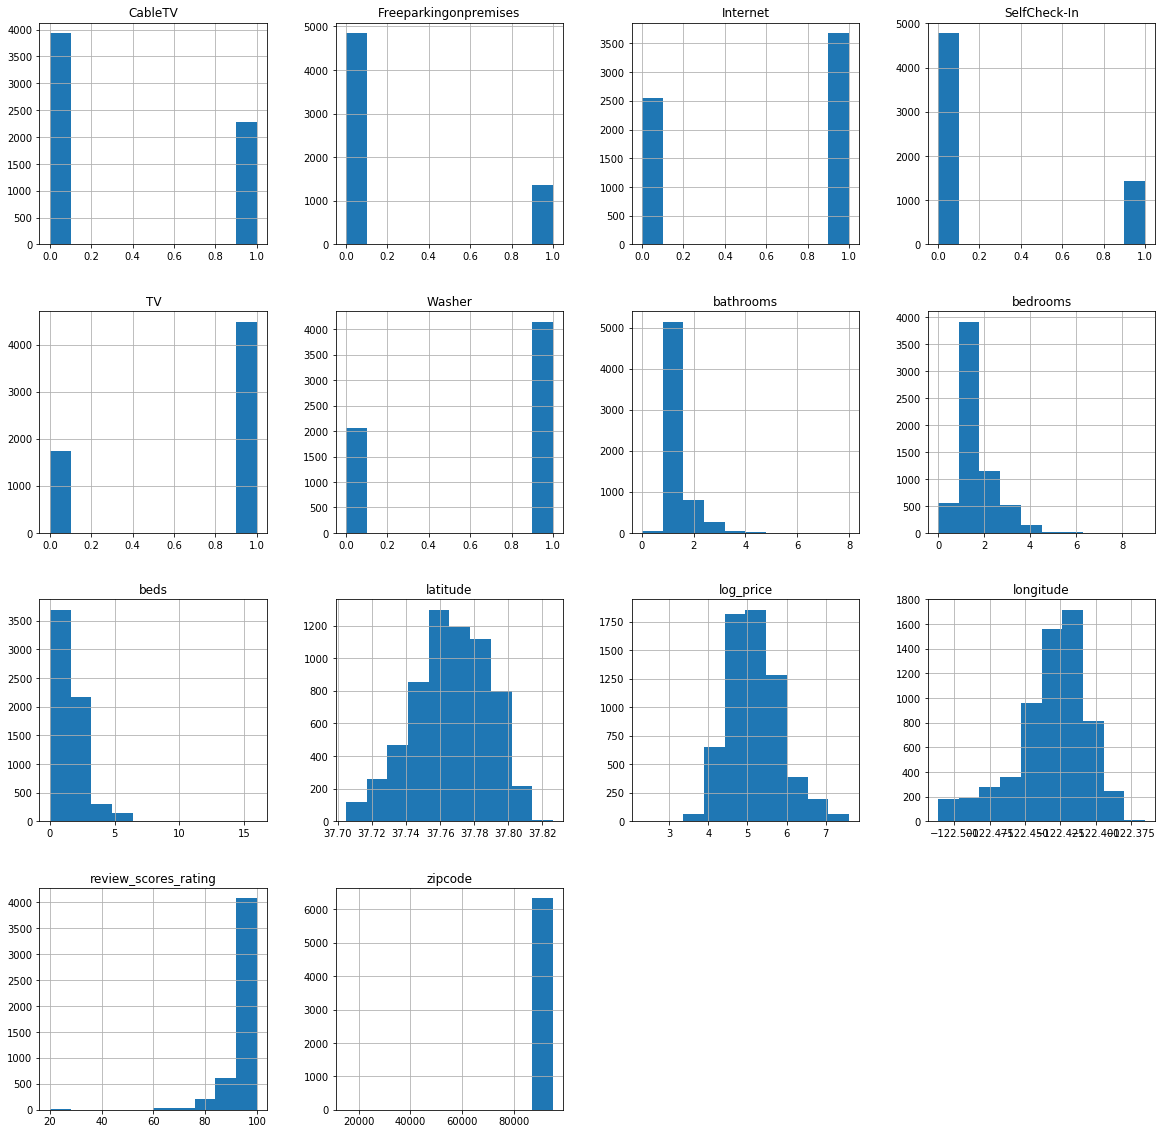

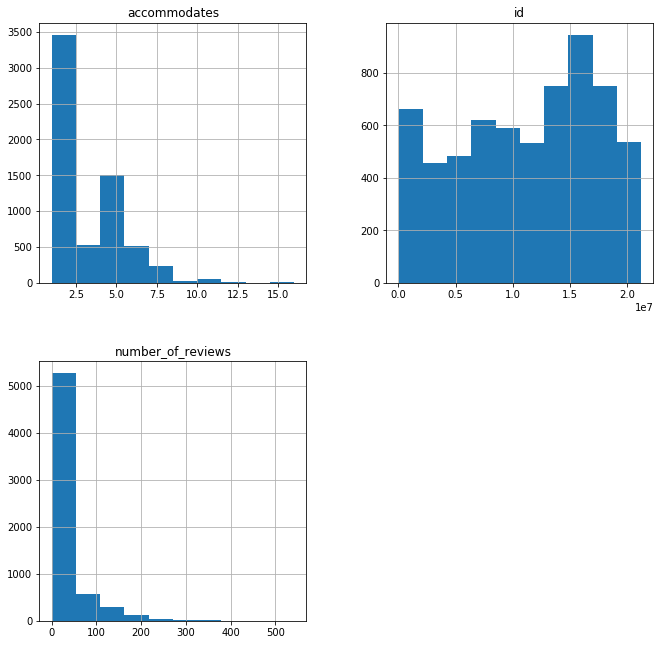

In [81]:
df[df.dtypes[(df.dtypes=="float")].index.values].hist(figsize=[20,20])
df[df.dtypes[(df.dtypes=="int64")].index.values].hist(figsize=[11,11])

Scatterplot

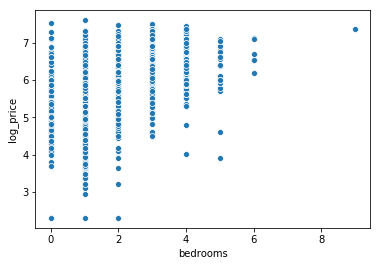

In [82]:
sns.scatterplot(x='bedrooms', y= 'log_price', data=df)

In [116]:
#Splitting the data into target and feature sets
X=df.drop(['log_price','bed_type','id','city','description','host_response_rate','cleaning_fee','first_review','host_has_profile_pic','host_identity_verified','host_since','last_review','latitude','longitude','name','neighbourhood','thumbnail_url','zipcode','accommodates'],axis=1)
y=df['log_price']


In [117]:
# viewing the shape of the dataframe after dropping columns
print("Shape of features dataframe : ", X.shape)

Shape of features dataframe :  (6217, 15)


In [118]:
X.columns.values

array(['property_type', 'room_type', 'bathrooms', 'cancellation_policy',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'CableTV', 'Freeparkingonpremises', 'Internet',
       'SelfCheck-In', 'TV', 'Washer'], dtype=object)

# Coverting Caategorical Variables to Dummy Variables

In [119]:
categorical=['property_type','room_type','instant_bookable','cancellation_policy']
X=pd.get_dummies(X, columns=categorical)

In [120]:
X.shape

(6217, 24)

# Feature Scaling

We are verifying the ditribution of data, whether the data is normally distributed or not.

In [121]:
from scipy import stats

a=np.array(df)
k,p=stats.mstats.normaltest(X) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

for i in range(len(X.columns)) :
    if p[i]<0.05:
      print(X.columns[i],'variable is not normal')
    else:
      print(X.columns[i],'variable is normal')

bathrooms variable is not normal
number_of_reviews variable is not normal
review_scores_rating variable is not normal
bedrooms variable is not normal
beds variable is not normal
CableTV variable is not normal
Freeparkingonpremises variable is not normal
Internet variable is not normal
SelfCheck-In variable is not normal
TV variable is not normal
Washer variable is not normal
property_type_Apartment variable is not normal
property_type_Hotel1 variable is not normal
property_type_Hotel2 variable is not normal
property_type_House variable is not normal
property_type_Other variable is not normal
room_type_Entire home/apt variable is not normal
room_type_Private room variable is not normal
room_type_Shared room variable is not normal
instant_bookable_f variable is not normal
instant_bookable_t variable is not normal
cancellation_policy_flexible variable is not normal
cancellation_policy_moderate variable is not normal
cancellation_policy_strict variable is not normal


In [122]:
# scaling the data and splitting it into training and test sets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Regression

In [123]:
X.head()

,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,CableTV,Freeparkingonpremises,Internet,SelfCheck-In,TV,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1.0,0,95.072398,2.0,2.0,1.0,0.0,1.0,0.0,1.0,...,1,0,1,0,0,1,0,1,0,0
1,1.0,3,100.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,0,1
2,1.0,159,99.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,1,0,0,1,0
3,1.0,138,96.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
4,2.0,18,97.000000,3.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,1,0,0


In [124]:
X.columns

Index(['bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds', 'CableTV', 'Freeparkingonpremises', 'Internet', 'SelfCheck-In',
       'TV', 'Washer', 'property_type_Apartment', 'property_type_Hotel1',
       'property_type_Hotel2', 'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_f', 'instant_bookable_t',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict'],
      dtype='object')

In [125]:
X.shape

(6217, 24)

In [126]:
y.head()

0    6.620073
1    4.442651
2    4.787492
3    4.828314
4    6.620073
Name: log_price, dtype: float64

# 1. KNN Regressor

Mean squared error varying with k [0.45700849235236407, 0.3636079384336735, 0.3201245981076892, 0.29852945096211597, 0.28911438358811276, 0.28865207896396006, 0.2869057811594218, 0.28711526967995993, 0.2865982358361276]


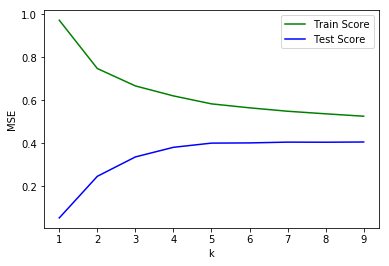

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_score_array = []
test_score_array = []
mean_squared=[]

for k in range(1,10):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    mean_squared.append(mean_squared_error(y_test,knn.predict(X_test)))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print('Mean squared error varying with k {}'.format(mean_squared))

# Applying grid search and Cross Validation

In [128]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.39


In [129]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015658,0.001266,0.037107,0.000862,1,{'n_neighbors': 1},0.115539,0.197640,-0.197537,-0.171196,...,0.974665,0.973436,0.974365,0.972102,0.978983,0.972729,0.974625,0.970929,0.973914,0.002065
1,0.015468,0.000669,0.045776,0.000700,2,{'n_neighbors': 2},0.335318,0.326938,0.158848,0.126566,...,0.748709,0.752899,0.750802,0.746404,0.751601,0.748448,0.749522,0.755871,0.749100,0.004133
2,0.015166,0.000749,0.052152,0.001339,3,{'n_neighbors': 3},0.386999,0.389821,0.240450,0.243261,...,0.665722,0.668213,0.662752,0.662537,0.664446,0.666637,0.663865,0.667341,0.664204,0.003001
3,0.015265,0.000773,0.056938,0.001501,4,{'n_neighbors': 4},0.395951,0.424359,0.284775,0.281741,...,0.617290,0.622101,0.618962,0.615752,0.616317,0.618438,0.611625,0.617339,0.615787,0.004593
4,0.014071,0.000297,0.060525,0.001094,5,{'n_neighbors': 5},0.401763,0.423123,0.308787,0.315470,...,0.583565,0.592509,0.584463,0.577304,0.579801,0.582501,0.576737,0.586018,0.581393,0.005332


In [ ]:
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

# Rebuilding the model on the best parameters found using Gridsearch

In [130]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test,y_test)))

Train score on best parameters 0.5256719862456063
Test score on best parameters 0.4056802677703343


# Plotting 'Bedroom' (feature) with Log_Price(Target Variable) to visualize how our KNN regressor fits the data

Text(0.5, 1.0, 'Number of bedrooms Vs. log_price')

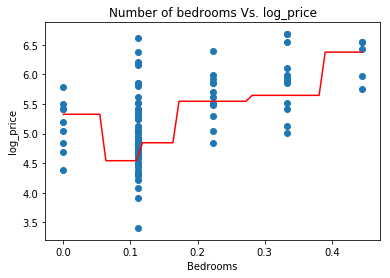

In [131]:
#bedrooms and log_price
X_b = X_train[:100,3].reshape(-1,1)
y_b = y_train[:100]

knn = KNeighborsRegressor(4)
knn.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Bedrooms')
plt.ylabel('log_price')
plt.title('Number of bedrooms Vs. log_price')

# 2. Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()

regressor.fit(X_train, y_train)
print('Train Score {}'.format(regressor.score(X_train, y_train)))
print('Test Score {}\n'.format(regressor.score(X_test, y_test)))

print('linear model coeff (w): {}\n'.format(regressor.coef_))
print('R-squared score (training): {:.3f}\n'.format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

Train Score 0.5228801189368266
Test Score 0.5182905927674942

linear model coeff (w): [ 1.01560910e+00 -3.79723147e-01  6.58348139e-01  1.87936266e+00
  1.20144083e+00  6.38974120e-04 -1.47221040e-02 -1.99843030e-04
  4.03953941e-02  4.23652562e-03 -1.87085010e-02  4.13379779e+12
  4.13379779e+12  4.13379779e+12  4.13379779e+12  4.13379779e+12
 -1.86054818e+12 -1.86054818e+12 -1.86054818e+12 -1.00150941e+12
 -1.00150941e+12 -7.95923245e+12 -7.95923245e+12 -7.95923245e+12]

R-squared score (training): 0.523

R-squared score (test): 0.518


Text(0.5, 1.0, 'Number of bedrooms Vs. log_price')

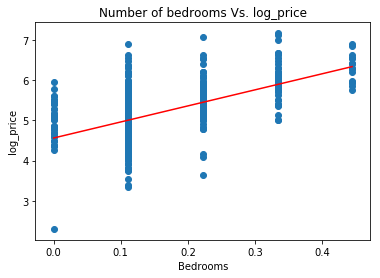

In [133]:
#bedrooms and log_price
X_b = X_train[:500,3].reshape(-1,1)
y_b = y_train[:500]

regressor = LinearRegression()

regressor.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressor.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Bedrooms')
plt.ylabel('log_price')
plt.title('Number of bedrooms Vs. log_price')

# 3.Ridge

We are using Ridge for preparing a more restricted model, with different values of hyperparameter - alpha and visualizing the train and test scores for different values of alpha


Text(0.5, 0, '$\\alpha$')

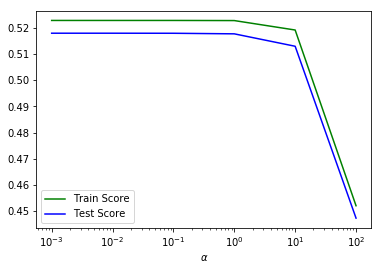

In [138]:
 from  sklearn.linear_model import Ridge
 #Ridge uses L2 Penalty

 #Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

#Fitting models for different values of alpha
for i in alpha: 
    ridge = Ridge(i)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# Visualizing features importance with various values of alpha

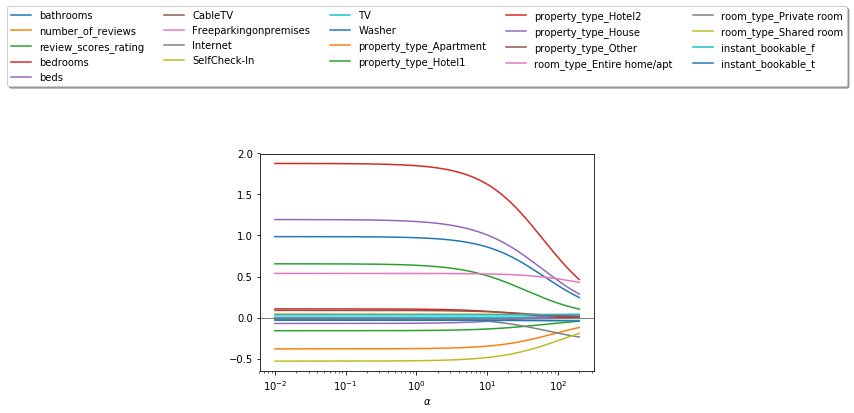

In [135]:
import numpy as np

x_range1 = np.linspace(0.01, 1, 10000).reshape(-1,1)
x_range2 = np.linspace(1, 200, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)

coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)
col=X.columns.values
for i in range(0,21):
    plt.plot(x_range, coeff[:,i], label = '{}'.format(col[i]))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=5, fancybox=True, shadow=True)
plt.show()

# Grid and cross validation to find the best parameters

In [139]:
param_grid = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.52


In [140]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001895,0.000537,0.000698,0.000457,0.001,{'alpha': 0.001},0.520976,0.564460,0.499290,0.517327,...,0.525088,0.523102,0.524251,0.527141,0.519196,0.525440,0.520319,0.525851,0.523071,0.002972
1,0.002097,0.000537,0.000500,0.000500,0.01,{'alpha': 0.01},0.520971,0.564459,0.499290,0.517329,...,0.525088,0.523101,0.524251,0.527141,0.519196,0.525440,0.520319,0.525851,0.523071,0.002972
2,0.001891,0.000536,0.000399,0.000489,0.1,{'alpha': 0.1},0.520916,0.564453,0.499286,0.517350,...,0.525087,0.523101,0.524251,0.527141,0.519196,0.525439,0.520319,0.525850,0.523070,0.002972
3,0.001995,0.000446,0.000399,0.000489,1,{'alpha': 1},0.520318,0.564334,0.499187,0.517499,...,0.525027,0.523042,0.524191,0.527081,0.519136,0.525380,0.520261,0.525785,0.523010,0.002972
4,0.002094,0.000537,0.000698,0.000457,3,{'alpha': 3},0.518715,0.563787,0.498605,0.517479,...,0.524587,0.522603,0.523748,0.526639,0.518690,0.524939,0.519834,0.525305,0.522567,0.002968


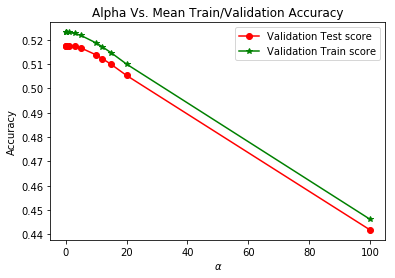

In [141]:
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# Rebuilding the model on the best parameters found using Gridsearch

In [142]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print('Train score on best parameters {}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters {}'.format(ridge.score(X_test,y_test)))

Train score on best parameters 0.5228491478848578
Test score on best parameters 0.517772475761396


Text(0.5, 1.0, 'Number of bedrooms Vs. log_price')

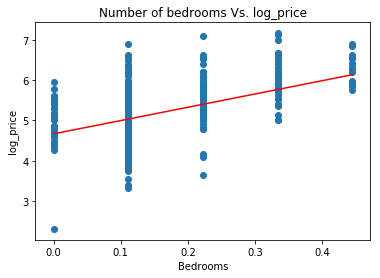

In [143]:
#bedrooms and log_price
X_b = X_train[:500,3].reshape(-1,1)
y_b = y_train[:500]

ridge= Ridge(alpha=1)

ridge.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = ridge.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Bedrooms')
plt.ylabel('log_price')
plt.title('Number of bedrooms Vs. log_price')

# Lasso

Text(0.5, 0, '$\\alpha$')

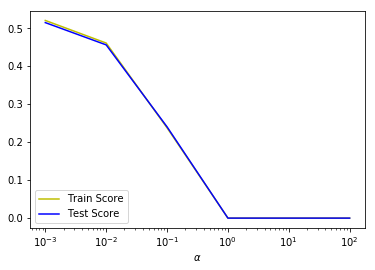

In [144]:
from  sklearn.linear_model import Lasso
# Lasso uses L1 Penalty

# Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

# Fitting models for different values of alpha
for i in alpha: 
    lasso = Lasso(i)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'y', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# Visualizing Features

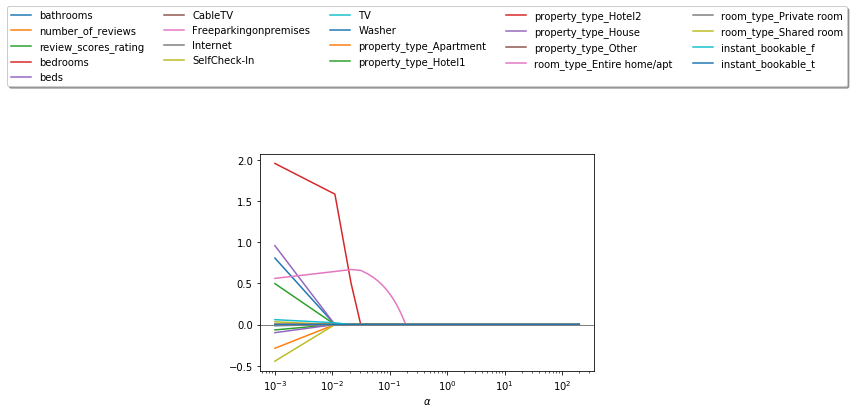

In [145]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 200, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)

coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,max_iter=1000)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)
col=X.columns.values
for i in range(0,21):
    plt.plot(x_range, coeff[:,i], label = '{}'.format(col[i]))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=5, fancybox=True, shadow=True)
plt.show()

# Grid and cross validation to find the best parameters

In [146]:
param_grid = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.52


In [147]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004588,0.000662,0.000798,0.000399,0.001,{'alpha': 0.001},0.517964,0.563571,0.498423,0.517033,...,0.523144,0.521078,0.522261,0.525211,0.517124,0.523448,0.518360,0.523729,0.521050,0.002994
1,0.002198,0.000389,0.000595,0.000486,0.01,{'alpha': 0.01},0.445534,0.506226,0.449299,0.465041,...,0.462913,0.461124,0.461748,0.466546,0.456847,0.463132,0.461425,0.462855,0.461366,0.003204
2,0.002293,0.000639,0.000299,0.000457,0.1,{'alpha': 0.1},0.228766,0.256197,0.235647,0.240511,...,0.241202,0.238694,0.238071,0.241597,0.234500,0.239429,0.239698,0.237842,0.238027,0.003475
3,0.001696,0.000457,0.000299,0.000457,1,{'alpha': 1},-0.000540,-0.001925,-0.000003,-0.003664,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001795,0.000598,0.000499,0.000499,3,{'alpha': 3},-0.000540,-0.001925,-0.000003,-0.003664,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


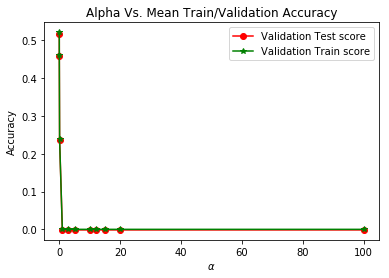

In [150]:
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# Rebuilding the model on the best parameters found using Gridsearch

In [149]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print('Train score on best parameters {}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters {}'.format(lasso.score(X_test,y_test)))

Train score on best parameters 0.520886129905079
Test score on best parameters 0.5151851965435686


Text(0.5, 1.0, 'Number of bedrooms Vs. log_price')

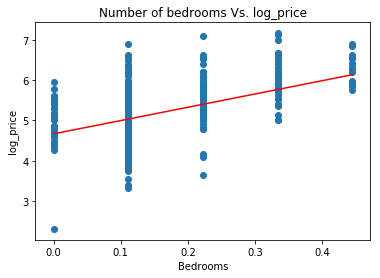

In [151]:
#bedrooms and log_price
X_b = X_train[:500,3].reshape(-1,1)
y_b = y_train[:500]

lasso= Lasso(alpha=0.01,max_iter=1000)

lasso.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = ridge.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Bedrooms')
plt.ylabel('log_price')
plt.title('Number of bedrooms Vs. log_price')

# Support Vector Machine

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
param_grid = {'C': [ 0.1, 1,10],
              'gamma': [0.1,1,10]}

grid_search = GridSearchCV(SVR(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [153]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.52


In [154]:
clf1 = LinearSVR(C=1).fit(X_train, y_train)
clf2 = SVR(kernel='linear', C=1).fit(X_train, y_train)
clf3 = SVR(kernel='rbf', gamma=.1, C=1).fit(X_train, y_train)
clf4 = SVR(kernel='poly', degree=3, C=1).fit(X_train, y_train)
print('Train score on best parameters for LinearSVR - {}'.format(clf1.score(X_train,y_train)))
print('Test score on best parameters ffor LinearSVR - {}'.format(clf1.score(X_test,y_test)))
print('Train score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_train,y_train)))
print('Test score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_test,y_test)))
print('Train score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_train,y_train)))
print('Test score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_test,y_test)))
print('Train score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_train,y_train)))
print('Test score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_test,y_test)))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score on best parameters for LinearSVR - 0.5153728969979721
Test score on best parameters ffor LinearSVR - 0.5157181788563185
Train score on best parameters for SVR kernel - Linear 0.516476113461436
Test score on best parameters for SVR kernel - Linear 0.5156708496043964
Train score on best parameters for SVR kernel - rbf 0.548963685806341
Test score on best parameters for SVR kernel - rbf 0.5228531926731668
Train score on best parameters for SVR kernel - poly 0.44970197461786465
Test score on best parameters for SVR kernel - poly 0.4393147235453028


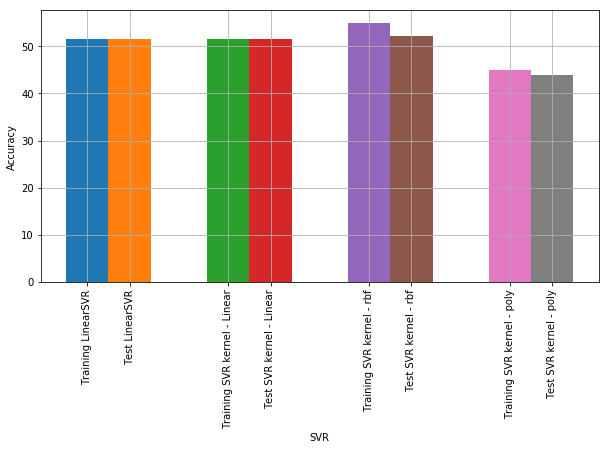

In [156]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
plt.xlabel('SVR')
plt.ylabel('Accuracy')
labels = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
labels1 = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[51.53,51.64,54.89,44.97]
accuracies_test=[51.57,51.56,52.28,43.93]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

We have used SVM for different types of Kernels using the best parameters obtained by Grid Search and compared the score for each model.
As shown in the graph above, SVR with 'rbf' kernel has the best train and test score

# Polynomial Regression

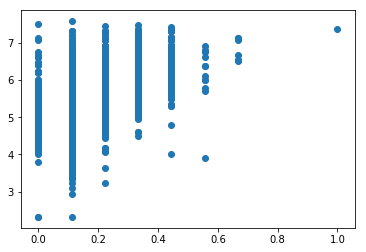

In [157]:
from  sklearn.preprocessing  import PolynomialFeatures
X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [158]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    regressor.fit(X_train_poly, y_train)
    train_score_list.append(regressor.score(X_train_poly, y_train))
    test_score_list.append(regressor.score(X_test_poly, y_test))

In [159]:
print(train_score_list)
print(test_score_list)

[0.5228965382087141, 0.5715660104089698, 0.6463214626214668]
[0.5180004654114845, 0.5126544016491215, -6.137378310411226e+20]


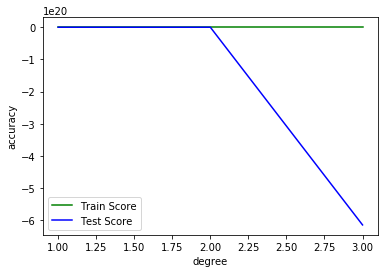

In [160]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

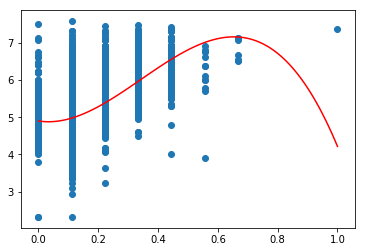

In [161]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
regressor.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = regressor.predict(x_poly)

X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# Conclusion for Regression

In [164]:
outside = ['Results','Results','Results','Results']
inside = ['Best parameter', 'Best Cross-Validation Score', 'Train Score on best parameter', 'Test Score on best parameter']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [165]:
data_reg = np.array([(9,0,1,0.001,1,1,0.1,3,3),
                     (0.390,0,0.520,0.520,0.520,0.520,0.520,0.520,0.520),
                     (0.525,0.522,0.522,0.520,0.515,0.516,0.548,0.449,0.522),
                     (0.405,0.518,0.517,0.515,0.515,0.515,0.522,0.439,0.518)])

In [166]:
df = pd.DataFrame(data_reg,index=hier_index,columns=['KNN Regressor','Simple Linear Regression','Ridge','Lasso', 'LinearSVR', 'SVM kernel - Linear', 'SVM kernel - rbf', 'SVM kernel - poly','Polynomial Regression'])


In [167]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='YlOrRd')
s

After making multiple models for th given dataset, we have concluded that the below algorithm with the specified parameters will give us best result for regression task in predicting the value of the target variable 'Log_Price'

Algorithm : SVR with kernel 'rbf'

Best parameters : {'C': 1, 'gamma': 0.1}

Best cross-validation score: 0.52

Train score on best parameters for SVR kernel - rbf 0.548

Test score on best parameters for SVR kernel - rbf 0.522